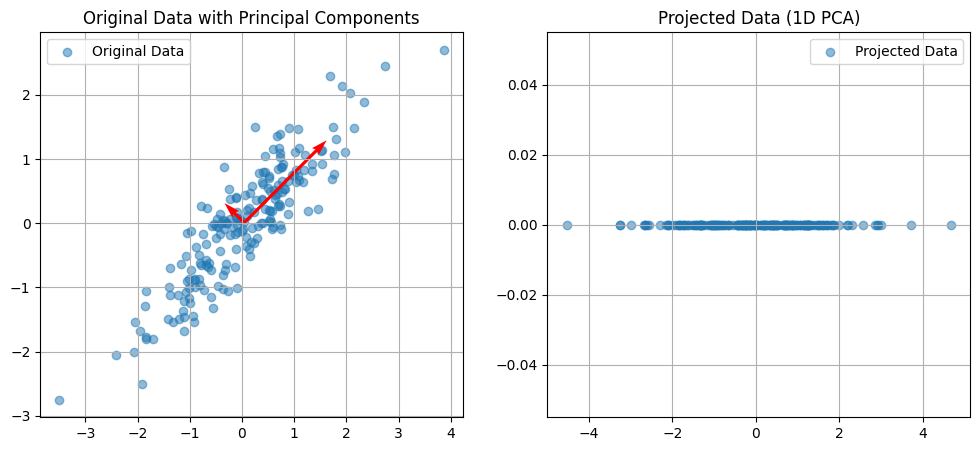

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T

# Step 2: Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(X_std.T)

# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 5: Sort eigenvalues and eigenvectors
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Step 6: Select top k principal components (k=1 for visualization)
k = 1
eigenvectors_reduced = np.array([eigen_pairs[i][1] for i in range(k)]).T

# Step 7: Project data onto principal components
X_pca = X_std @ eigenvectors_reduced

# Step 8: Reconstruct for visualization
X_reconstructed = (X_pca @ eigenvectors_reduced.T) * scaler.scale_ + scaler.mean_

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original Data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.5, label="Original Data")
for vec, val in zip(eigenvectors.T, eigenvalues):
    ax[0].quiver(*scaler.mean_, *vec * np.sqrt(val), color='r', scale=5)
ax[0].set_title("Original Data with Principal Components")
ax[0].legend()
ax[0].grid()

# Transformed Data
ax[1].scatter(X_pca, np.zeros_like(X_pca), alpha=0.5, label="Projected Data")
ax[1].set_title("Projected Data (1D PCA)")
ax[1].legend()
ax[1].grid()

plt.show()
